In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data set
laptop_df = pd.read_csv('laptop_price.csv', encoding = 'latin-1') 

In [3]:
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Removing the product name as it will never be  variable affecting the price
laptop_df = laptop_df.drop('Product', axis = 1)
laptop_df

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [6]:
# Converting Company into categorical data and joining them
laptop_df = laptop_df.join(pd.get_dummies(laptop_df['Company'], dtype = int))

In [7]:
laptop_df = laptop_df.drop('Company', axis = 1)

In [8]:
# Converting TypeName into categorical data and joining them
laptop_df = laptop_df.join(pd.get_dummies(laptop_df['TypeName'], dtype = int))
laptop_df = laptop_df.drop('TypeName', axis = 1)

In [9]:
laptop_df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [10]:
laptop_df['ScreenResolution'] = laptop_df['ScreenResolution'].str.split().apply(lambda x: x[-1])
laptop_df['Screen_Width'] = laptop_df['ScreenResolution'].str.split('x').apply(lambda x: x[0])
laptop_df['Screen_Height'] = laptop_df['ScreenResolution'].str.split('x').apply(lambda x: x[1])

In [11]:
laptop_df = laptop_df.drop('ScreenResolution', axis = 1)

In [12]:
laptop_df['Screen_Width'] = laptop_df['Screen_Width'].astype("int")
laptop_df['Screen_Height'] = laptop_df['Screen_Height'].astype("int")

In [13]:
laptop_df['Cpu Brand'] = laptop_df['Cpu'].str.split().apply(lambda x: x[0])
laptop_df['Cpu Frequency'] = laptop_df['Cpu'].str.split().apply(lambda x: x[-1])

In [14]:
laptop_df = laptop_df.drop('Cpu', axis = 1)

In [15]:
laptop_df['Cpu Frequency'] = laptop_df['Cpu Frequency'].str[:-3]

In [16]:
laptop_df['Cpu Frequency'] = laptop_df['Cpu Frequency'].astype("float")

In [17]:
laptop_df['Ram'] = laptop_df['Ram'].str[:-2]
laptop_df['Ram'] = laptop_df['Ram'].astype("int")

In [18]:
laptop_df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen_Width,Screen_Height,Cpu Brand,Cpu Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [19]:
laptop_df['Memory Amount'] = laptop_df['Memory'].str.split().apply(lambda x: x[0])
laptop_df['Memory Type'] = laptop_df['Memory'].str.split().apply(lambda x: x[1])

In [20]:
def memory_into_mb(value):
    if 'GB' in value:
        return float(value[:value.find('GB')])*1000
    elif 'TB' in value:
        return float(value[:value.find('TB')])*1000000

In [21]:
laptop_df['Memory Amount'] = laptop_df['Memory Amount'].apply(memory_into_mb)

In [22]:
laptop_df.drop('Memory', axis = 1 , inplace = True)

In [23]:
laptop_df['Weight'] = laptop_df['Weight'].str[:-2]
laptop_df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1303, dtype: object

In [24]:
laptop_df['Weight'] = laptop_df['Weight'].astype("float")

In [25]:
laptop_df['Gpu_Brand'] = laptop_df['Gpu'].str.split().apply(lambda x: x[0])
laptop_df['Gpu_Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu_Brand, Length: 1303, dtype: object

In [26]:
laptop_df.drop('Gpu', axis =1 , inplace = True)

In [27]:
laptop_df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [28]:
laptop_df = laptop_df.join(pd.get_dummies(laptop_df['OpSys'], dtype = int))
laptop_df

,laptop_ID,Inches,Ram,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,Gpu_Brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,macOS,1.37,1339.69,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,2,13.3,8,macOS,1.34,898.94,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,3,15.6,8,No OS,1.86,575.00,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0
3,4,15.4,16,macOS,1.83,2537.45,0,1,0,0,...,AMD,0,0,0,0,0,0,0,0,1
4,5,13.3,8,macOS,1.37,1803.60,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,Windows 10,1.80,638.00,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1299,1317,13.3,16,Windows 10,1.30,1499.00,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1300,1318,14.0,2,Windows 10,1.50,229.00,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1301,1319,15.6,6,Windows 10,2.19,764.00,0,0,0,0,...,AMD,0,0,0,0,0,1,0,0,0


In [29]:
laptop_df.drop('OpSys', axis =1 , inplace = True)

In [30]:
cpu_categories = pd.get_dummies(laptop_df['Cpu Brand'], dtype = int)
cpu_categories = cpu_categories.rename(columns = lambda x: x + '_Cpu')
cpu_categories

,AMD_Cpu,Intel_Cpu,Samsung_Cpu
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1298,0,1,0
1299,0,1,0
1300,0,1,0
1301,0,1,0


In [31]:
laptop_df = laptop_df.join(cpu_categories)
laptop_df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_Cpu,Intel_Cpu,Samsung_Cpu
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
laptop_df.drop('Cpu Brand', axis = 1, inplace = True)

In [33]:
gpu_categories = pd.get_dummies(laptop_df['Gpu_Brand'], dtype = int)
gpu_categories = gpu_categories.rename(columns = lambda x: x + '_Gpu')
gpu_categories

,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
1298,0,0,1,0
1299,0,0,1,0
1300,0,0,1,0
1301,1,0,0,0


In [34]:
laptop_df = laptop_df.join(gpu_categories)
laptop_df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_Cpu,Intel_Cpu,Samsung_Cpu,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [35]:
laptop_df.drop('Gpu_Brand', axis = 1, inplace = True)

In [36]:
laptop_df.drop('Memory Type', axis = 1, inplace = True)

In [37]:
target_corr = laptop_df.corr()['Price_euros'].apply(abs).sort_values()
target_corr

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_Gpu               0.018431
Samsung_Cpu           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [38]:
selected_features = target_corr[-21:].index

In [39]:
selected_features = list(selected_features)
selected_features

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_Cpu',
 'Intel_Cpu',
 'Intel_Gpu',
 'AMD_Gpu',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_Gpu',
 'Gaming',
 'Cpu Frequency',
 'Notebook',
 'Screen_Height',
 'Screen_Width',
 'Ram',
 'Price_euros']

In [40]:
new_laptop_df = laptop_df[selected_features]

In [41]:
new_laptop_df

,Windows 7,Linux,No OS,MSI,AMD_Cpu,Intel_Cpu,Intel_Gpu,AMD_Gpu,Acer,Weight,...,Workstation,Ultrabook,Nvidia_Gpu,Gaming,Cpu Frequency,Notebook,Screen_Height,Screen_Width,Ram,Price_euros
0,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,0,0,0,0,0,1,1,0,0,1.34,...,0,1,0,0,1.8,0,900,1440,8,898.94
2,0,0,1,0,0,1,1,0,0,1.86,...,0,0,0,0,2.5,1,1080,1920,8,575.00
3,0,0,0,0,0,1,0,1,0,1.83,...,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,3.1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,1,0,0,1.80,...,0,0,0,0,2.5,0,1080,1920,4,638.00
1299,0,0,0,0,0,1,1,0,0,1.30,...,0,0,0,0,2.5,0,1800,3200,16,1499.00
1300,0,0,0,0,0,1,1,0,0,1.50,...,0,0,0,0,1.6,1,768,1366,2,229.00
1301,0,0,0,0,0,1,0,1,0,2.19,...,0,0,0,0,2.5,1,768,1366,6,764.00


<Axes: >

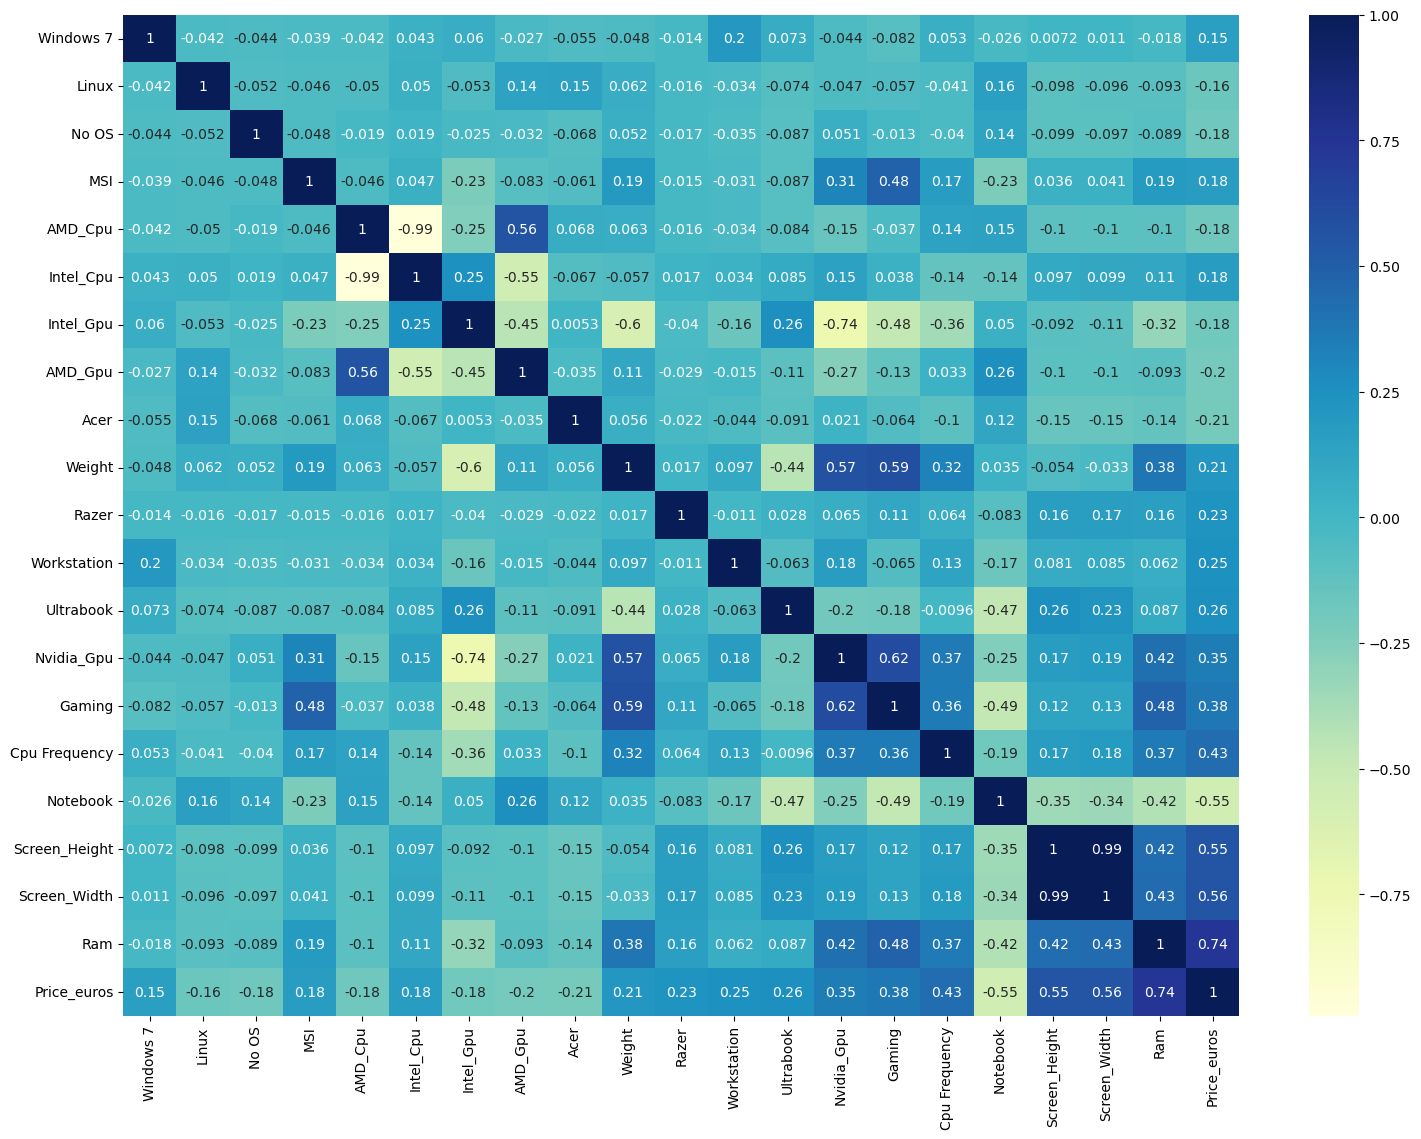

In [42]:
plt.figure(figsize = (18,13))
sns.heatmap(new_laptop_df.corr(), annot = True, cmap ='YlGnBu')

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

new_laptop_df = pd.DataFrame(new_laptop_df)

# Separating features and target
x, y = new_laptop_df.drop("Price_euros", axis=1), new_laptop_df['Price_euros']

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the training data
x_train_scaled = scaler.fit_transform(x_train)

# Scaling the test data (using the same scaler fitted on the training data)
x_test_scaled = scaler.transform(x_test)

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [59]:
forest = RandomForestRegressor(random_state=42)

forest.fit(x_train_scaled_df,y_train)

RandomForestRegressor(random_state=42)

In [61]:
forest.score(x_test_scaled_df, y_test)

0.8280328645265406

In [46]:
x_new_scaled = scaler.transform([x_test.iloc[5]])

C:\Users\yashk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
forest.predict(x_new_scaled)

array([1574.141])

In [48]:
y_test.iloc[5]

1398.99

In [63]:
import shap
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(x_test_scaled_df)

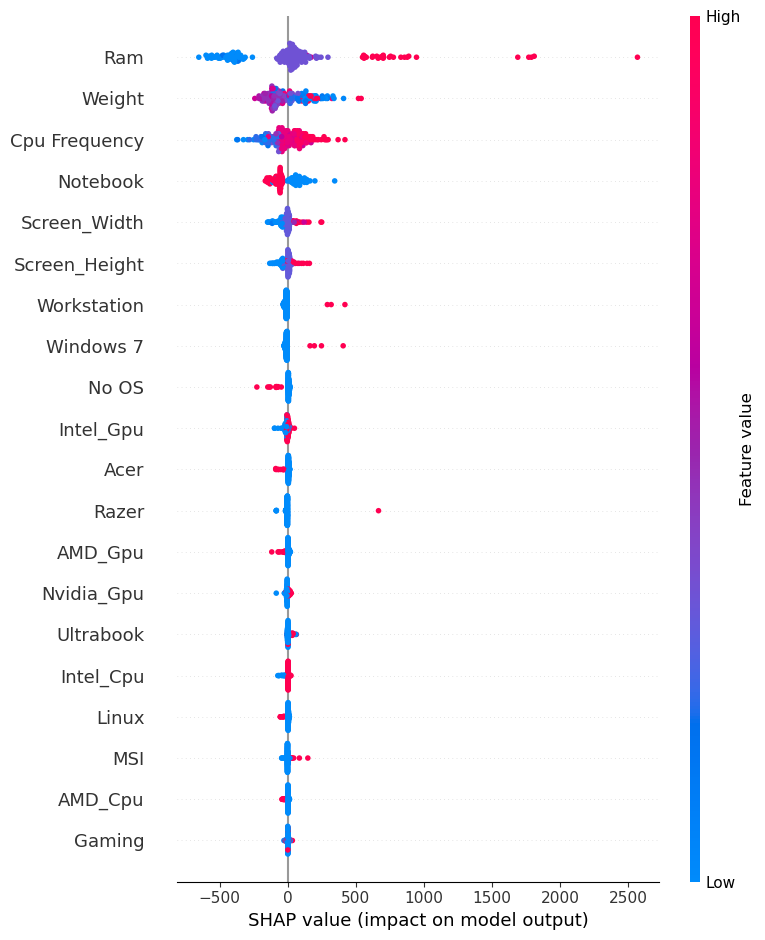

In [65]:
shap.summary_plot(shap_values, x_test_scaled_df )